# Solving the original Diasywolrd Model 

The Daisyworld model was created by Lovelock and Watson (1983) to support the Gaia hypothesis. This hypothesis proposes that the Earth is a self-regulated system. In  this system, the interaction between the organisms and their environment can stabilize the surface temperature of the Earth, and other environmental variables, despite external forcings. There were two main critics to Gaia hypothesis. First, it was believed that the self-regulation of the Earth could be explained without necessity of life. Second, it was believed that natural selection, acting at the level of selfish individuals, could never give raise to a self-regulation of the at planetary level (Doolittle, 1981; Walker et. al., 1981).
	In order to respond to these critics, Lovelock and Watson had to find a way to show that natural selection could result in planetary regulation, and that this regulation could not arise without life. To achieve this, Lovelock and Watson created the Daisyworld model.


### Equations

Daisyworld is a model of a planet with only two types of organisms: white and black Daisies. The growth of these daisies is governed by the following equation:

\begin{equation} \tag{1}
\frac{d \alpha_i}{d t} = \alpha_i (x \beta - \gamma)
\end{equation}

where $\alpha_i$ is the fraction of area of the planet covered by white ($\alpha_w$) or black ($\alpha_b$) daisies, $x$ is the fraction of area of fertile ground not covered by daisies, $\beta$ is the growth rate of daisies per unit of time, and $\gamma$ is the death rate. 

The area of free fertile ground is given by:

\begin{equation} \tag{2}
x = p - a_i
\end{equation}

where $p$ is the proportion of the planet that is fertile ground. The growth rate $\beta$ is given by a parabolic function that is zero out of the range between 5°C and 40°C, and reaches its maximum at 22.5°C:

\begin{equation} \tag{3}
\beta = 1 - 0.003265(22.5 - T_i)
\end{equation} 

where $T_i$ is the temperature of the daisies. The temperature of the planet Daisywolrd is given by the radiative equilibrium equation:

\begin{equation} \tag{4}
\sigma (T_e + 273)^4 = S L (1 -A)
\end{equation} 

Here, $\sigma$ is the Steffan-Botlzman constant, $S$ is a flux constant, and $L$ is a dimensionless number that measures the measures the luminosity of Daisyworld's sun.

$A = \sum \alpha_i A_i = \alpha_w A_w + \alpha_b A_b + \alpha_g A_g $ is the total albedo of the planet. This albedo is the sum of the albedos of the the daisies and of the free ground multiplied for the fraction of area that they occupy. Note that $\alpha_g = 1 - \alpha_w  - \alpha_b$. It is interesting that Lovelock and Watson mention that this equation only holds for a flat or cylindrical planet. I suppose this is because a spherical surface has a larger area than a flat one. Thus, in a spherical surface the contribution for the total albedo would be larger.

Finally, the authors model the temperature of the daisies with the following equation:

\begin{equation} \tag{5}
(T_i + 273)^4 = q(A -A_i) + (T_e + 273)^4
\end{equation} 

The authors provide the following justification for this equation. First, this equation makes sure that the temperature of the black daisies is greater than the temperature of the ground, which in turn, is grater that the temperature of the white daisies. This pattern is expected because of the color of the daisies. Second, this equation makes sure that the total radiation lost to space is equal to the radiation lost to space in each area of daisies and ground. In other words, this equation makes sure that energy is conserved.

To see this, let's start with the sum of the lost radiation in each area: $F = \sum \alpha_i \sigma (T + 273)$. We can now use equation 5 to obtain $\sigma q A \sum \alpha_i - \sigma q A_i \sum \alpha_i + \sum \alpha_i \sigma (T_e + 273)^4$. Now, since the sum of all the albedos is equals to one ($\sum \alpha_i = 1$), and $A = \sum \alpha_i A_i$, the first two terms cancel out and we get: $F = \sigma (T_e + 273)^4 $, which is the energy lost to space from Daisyworld. 



### Solving the equations

We can solve this equations using numerical methods. We can user the Euler method, or the Runge-Kutta methods. Here we will implement this methods in python.

#### Euler method

The Euler method consist in making linear approximations to solve an ordinary differential equation of the form $\frac{dx}{dt} = f(x, t)$. We know that at every point the function f(x,y) gives us the slope of a line tangent to the solution curve. Thus, we can start at an initial point and take a small step in this direction. Then we recalculate the slope at the next point and take another small step. In this way, we can approximate the solution by taking small temps in the direction of the lines given by the derivative. This is represented by the equation:

\begin{equation*}
x_{n+1} = x_{n} + f(x,t) * h
\end{equation*} 

Where $h = t_{n+1}-t_{n}$ is the size of the step. Let's implement this in python.

In [1]:
def euler_method_next(x0, t0, f, h):
    '''
    This function uses the eluer method to solve an ordinary differential equation.
    INPUT:
        x0(float): x initial condition
        t0(float): t initial condition
        f (function): function defining the derivative dx/dt = f
        h (float): step
    OUTPUT:
        y (numpy array): value of y at next step
    '''
    return x0 + f(x0, t0) * h

####  Runge-Kutta methods

The Runge-Kutta methods also allow us to solve ordinary differential equations. In particular the method of fourth order, known as 'RK4', introduces a series of corrections to the Euler method, allowing us to make more precise approximations. This method consists in correcting the euler's method with the following terms:

\begin{equation*}
x_{n+1} = x_n + \frac{k1}{6} + \frac{k2}{3} + \frac{k3}{3} + \frac{k4}{2}
\end{equation*}

Where, $k_1 = h  f(x_n, t_n)$, $k_2 = h f(x_n + \frac{k_1}{2}, t_n + \frac{h}{2})$, $k_3 = h f (x_n + \frac{k_2}{2}, t_n + \frac{h}{2})$, and $k_4 = h f(x_n + k_3, t_n + h)$.

In [27]:
def RK4_next(x0, t0, f, h):
    '''
    This function uses the RK4 method to solve an ordinary differential equation.
    INPUT:
        x0(float): x initial condition
        t0(float): t initial condition
        f (function): function defining the derivative dx/dt = f
        h (float): step
    OUTPUT:
        y (numpy array): value of y at next step
    '''
    k1 = h * f(x0, t0) 
    k2 = h * f(x0 + 0.5 * h, t0 + 0.5 * k1) 
    k3 = h * f(x0 + 0.5 * h, t0 + 0.5 * k2) 
    k4 = h * f(x0 + h, t0 + k3) 
    return x0 + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 


Now we can solve the model. We are interested in the effect of the increase of solar luminosity in the life and temperature of Daisyworld. Let's create a python class to solve the model.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class Original_Daisyworld():
    q = 2064250710.0 #20 # Heat Transfer Coefficient
    sigma = 5.6704e-5  #Stefan-Boltzman Constant
    S = 9.17e+5  # Solar constant
    
    def __init__(self
                ,death_rate =.3 #death rate of daysies
                ,albedo_w=0.75  #white daysies albedo
                ,albedo_g=0.5  #Free ground albedo      
                ,albedo_b=0.25  #Black daysies albedo
                ,area_w= 0.3 # Fraction area of white daisies
                ,area_b= 0.3 # Fraction area of black daisies
                ,L = 0.5 # Solar luminosity constant
                ):
        'Initilize all the constants and variables'
        self.death_rate = death_rate
        self.albedo_w = albedo_w
        self.albedo_g = albedo_g
        self.albedo_b = albedo_b
        self.area_w = area_w
        self.area_b = area_b
        self.area_g = 1 - self.area_b - self.area_w # Equation 2
        self.L = L
        self.albedo_total = self.area_w * self.albedo_w + self.area_b * self.albedo_b + self.area_g * self.albedo_g
        self.Te = ((self.S * self.L * (1- self.albedo_total) / self.sigma) ** 0.25)- 273 #Equation 4
        self.Tw = (self.q*(self.albedo_total - self.albedo_w) + (self.Te +273)**4 )**.25 -273
        self.Tb = (self.q*(self.albedo_total - self.albedo_b)+ (self.Te +273)**4 )**.25 -273
        self.Bw = 1 -0.003265 * ((22.5-self.Tw)**2) #Equation 2
        self.Bb = 1 -0.003265 * ((22.5-self.Tb)**2) #Equation 2
        
    def update_area_g(self):
        'Calclates area of free ground'
        self.area_g = 1 - self.area_b - self.area_w 
        return self.area_g
    
    def update_albedo_total(self):
        self.albedo_total = self.area_w * self.albedo_w + self.area_b * self.albedo_b + self.area_g * self.albedo_g

    
    def update_global_temp(self):
        self.Te = ((self.S * self.L * (1- self.albedo_total) / self.sigma) ** 0.25)- 273

    
    def update_daisies_temp(self):
        self.Tw = (self.q*(self.albedo_total - self.albedo_w) + (self.Te +273)**4 )**.25 -273
        self.Tb = (self.q*(self.albedo_total - self.albedo_b)+ (self.Te +273)**4 )**.25 -273
        #Linear aproximation case (q = 20)
        #self.Tw = self.q*(self.albedo_total-self.albedo_w)+ self.Te 
        #self.Tb = self.q*(self.albedo_total-self.albedo_b)+ self.Te 
    
    def update_growth_rate(self):
        self.Bw = 1 -0.003265 * ((22.5-self.Tw)**2)
        self.Bb = 1 -0.003265 * ((22.5-self.Tb)**2)
    
    
    def solve_model(self, iterations = 1000, h = 0.1, store_values = False):
        'Solve equation 1 with euler method and recalculate all other variables'
        AW, AB, AG, TW, TB, TE = ([],[],[],[],[],[])
        for i in range(iterations):
            self.area_w += h * self.area_w * (self.Bw * self.area_g -self.death_rate)
            self.area_b += h * self.area_b * (self.Bb * self.area_g -self.death_rate)
            self.update_area_g()
            self.update_albedo_total()
            self.update_global_temp()
            self.update_daisies_temp()
            self.update_growth_rate()
            if store_values:
                AW.append(self.area_w)
                AB.append(self.area_b)
                AG.append(self.area_g)
                TW.append(self.Tw)
                TB.append(self.Tb)
                TE.append(self.Te) 
        if store_values:
            self.AW = AW
            self.AB = AB
            self.AG = AG
            self.TW = TW
            self.TB = TB
            self.TE = TE
            
    def plot_model(self):
        '''Makes a plot of the daises areas and of the global temperature with time'''
        time = (np.arange(0, len(self.AB)) / 10).tolist()
        plt.figure()
        plt.plot(time, self.AB, 'k', linewidth=2, label='Black')
        plt.plot(time, self.AW, 'k:',linewidth=2,label='White')
        plt.xlabel('Time (years)', fontsize=15)
        plt.ylabel(r'Fraction area area_i', fontsize=15)
        plt.title('Change in daisies population', fontsize=17)
        legend = plt.legend(loc=1, shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')
        
        plt.figure()
        plt.plot(time, self.TB, 'k', linewidth=2, label='Tb')
        plt.plot(time, self.TW, 'k:', linewidth=2, label='Tw' )
        plt.plot(time, self.TE, 'k--', linewidth=2, label='Te' )
        plt.xlabel('Time (years)', fontsize=15)
        plt.ylabel(r'Temperature (°C)', fontsize=15)
        plt.title('Change in Temperature', fontsize=17)
        legend = plt.legend(loc=1, shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')
            
       
    def change_luminosity(self, L):
        '''
        Change the sola luminosity in the model
        INPUT:
            self: Daisywolrd class
            L (lIST): list describing change in luminosity.
        '''
        #iteration parameters
        n = len(L)
        h = 0.1
        iterations = 1000
        # lists to store values
        TE = []
        A_W = []
        A_B = []
        A_G = []
        # initial values
        area_w, area_b, albedo_w, albedo_b, albedo_g, death_rate =\
        self.area_w, self.area_b, self.albedo_w, self.albedo_b, self.albedo_g, self.death_rate
        for i in range(n):
            model = Original_Daisyworld(area_w=area_w, area_b = area_b)
            model.L = L[i]
            model.solve_model(iterations, h)
            A_W.append(model.area_w)
            A_B.append(model.area_b)
            A_G.append(model.area_g)
            TE.append(model.Te)
        self.Te = np.array(TE)
        self.area_w = np.array(A_W)
        self.area_b = np.array(A_B)
        self.area_g= np.array(A_G)
        self.L = L
        self.no_life_Te = (self.S * self.L * (1- 0.5) / self.sigma)**0.25-273
    
    def plot_change_luminosity(self):
        '''Makes plots of the change in solar luminosity'''
        fig, ax = plt.subplots()
        ax.plot(self.L, self.area_b, 'k', linewidth=2, label='Black')
        ax.plot(self.L, self.area_w, 'g',linewidth=3,label='White')
        ax.plot(self.L, self.area_b + self.area_w, 'k--', linewidth=2, label='Sum')
        plt.xlabel('Solar Luminosity $L$', fontsize=15)
        plt.ylabel(r'Fraction area area_i', fontsize=15)
        plt.title('Figure 1', fontsize=17)
        plt.axis([0.4, 1.8, -0.1, 0.8])
        legend = ax.legend(loc=1, shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')
        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width
        plt.show()
        
        fig, ax = plt.subplots()
        ax.plot(self.L, self.Te, 'g', linewidth=3, label='T with daisies')
        ax.plot(self.L, self.no_life_Te , 'k--', linewidth=2, label='T without daisies')
        plt.xlabel('Solar Luminosity $L$', fontsize=15)
        plt.ylabel('$T $ [$^\circ C$]', fontsize=15)
        plt.title('Figure 2', fontsize=17)
        plt.axis([0.4, 1.6, -30, 70])
        legend = ax.legend(loc=4, shadow=True)
        frame = legend.get_frame()
        frame.set_facecolor('0.90')
        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width
        plt.show()

Now that we have the class let's solve the model for a luminosity of 1, and 250 iterations. To do this he just have to create an Original_Daisyworld object with $L=1$, and use the solve_model and plot_model methods, setting `store_values = True`. 

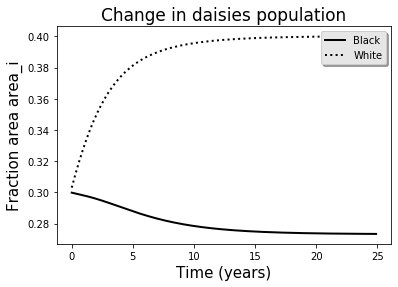

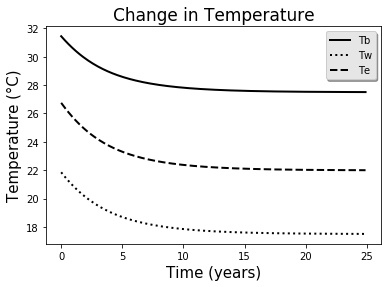

In [27]:
model = Original_Daisyworld(L = 1)
model.solve_model(store_values = True, iterations = 250)
model.plot_model()

In the above figure we can see that the populations of daisies, and the local and global temperatures reach an stable equilibrium after some time. Now let's see what happens when we vary the luminosity and there are no white daisies on the planet. To do this we just have to create an `Original_Daisyworld` object with the area of white daisies equals to zero. Then we just have to used the `change_luminosity` and `plot_model` methods to see the results.

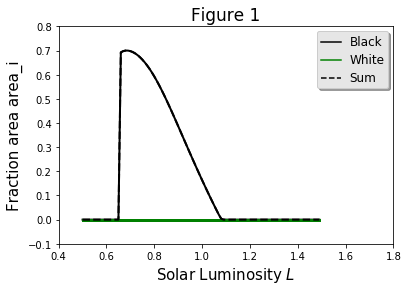

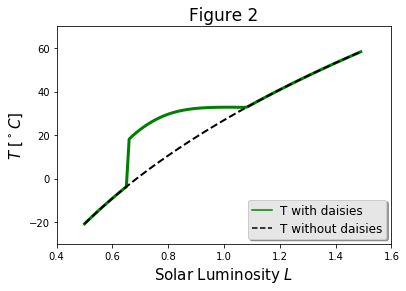

In [28]:
L = np.arange(.5,1.5,0.01)
daisywolrd_no_white = Original_Daisyworld(area_w=0)
daisywolrd_no_white.change_luminosity(L)
daisywolrd_no_white.plot_change_luminosity()

We can see that in this version of Dasyworld the black daisies increase their population abruptly around 0.7 $L$, and then population starts to decrease as the luminosity increases. The temperature of the planet shows a stable zone where the temperature does not vary much despite the increase in luminosity.

Now let's see what happens in a Dasyworld without black daisies:

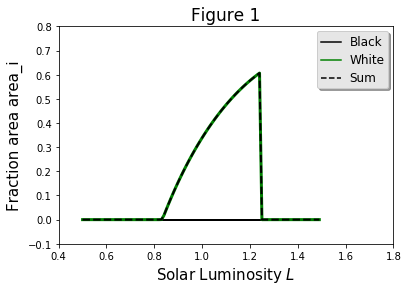

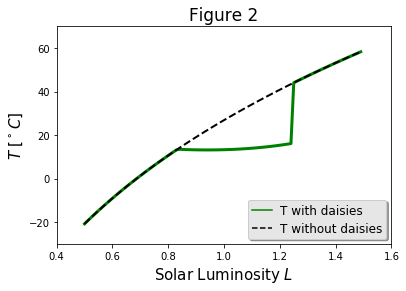

In [29]:
L = np.arange(.5,1.5,0.01)
daisywolrd_no_black = Original_Daisyworld(area_b=0)
daisywolrd_no_black.change_luminosity(L)
daisywolrd_no_black.plot_change_luminosity()

In this case the population of white daisies increases as the luminosity increases, and it disappears abruptly at around 1.2 $L$. The temperature also shows a stability period where there is no much change despite increasing luminosity. However, it is interesting to note that this zone of stability presents at a lower temperature that in the case of no white daisies.

Finally, let's see the case with both white and dark daises:

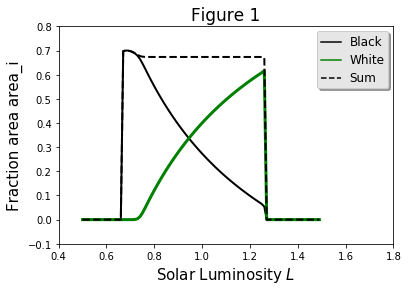

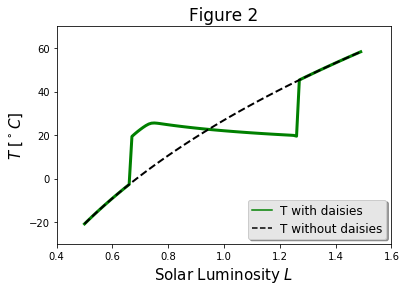

In [30]:
L = np.arange(.5,1.5,0.01)
daisywolrd = Original_Daisyworld(area_b=0.3, area_w=0.3)
daisywolrd.change_luminosity(L)
daisywolrd.plot_change_luminosity()

In this case we see that there is a greater zone of temperature stability. The total sum of life also remains constant for a great range of solar luminosity. In my opinion this is amazing. This results show how the presence of life in Daisywolrd is essential to regulate the temperature against external forcings. This model shows that a planet can regulate itself thanks to the interactions of the organisms with their environment. That is why this is one of my favorite models.

# References

* Doolittle, F. (1981). Is Nature Really Motherly? The Coevolution Qaterly Spring, 29, 58– 62.
* Lovelock, J., & Watson, A. (1983). Biological homeostasis of the global environment: the parable of Daisyworld. Tellus, 35B, 284–289.
* Walker, J., Kasting, J., & Hays, P. B. (1981). A Negative Feedback Stabilization Mechanism for the Long-term Of Earth’s Surface Temperature. Journal od Geophysical Research, 86(C10), 9776–9782.
